✅ Sample dataset created

   ID  Age Gender   BMI  Sleep_hours  Exercise_hours Smoking Alcohol  \
0   1   56      F  18.2            5               3      No     Yes   
1   2   69      M  24.8            9               3      No     Yes   
2   3   46      M  26.5            7               3     Yes     Yes   
3   4   32      F  24.9            9               0      No     Yes   
4   5   60      M  16.7            6               3      No     Yes   

   Blood_Pressure  Cholesterol  Glucose Disease_Risk  
0             154          253      132       Medium  
1             152          226      150       Medium  
2             140          295      169         High  
3             125          151      191       Medium  
4             155          157      113          Low  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0  

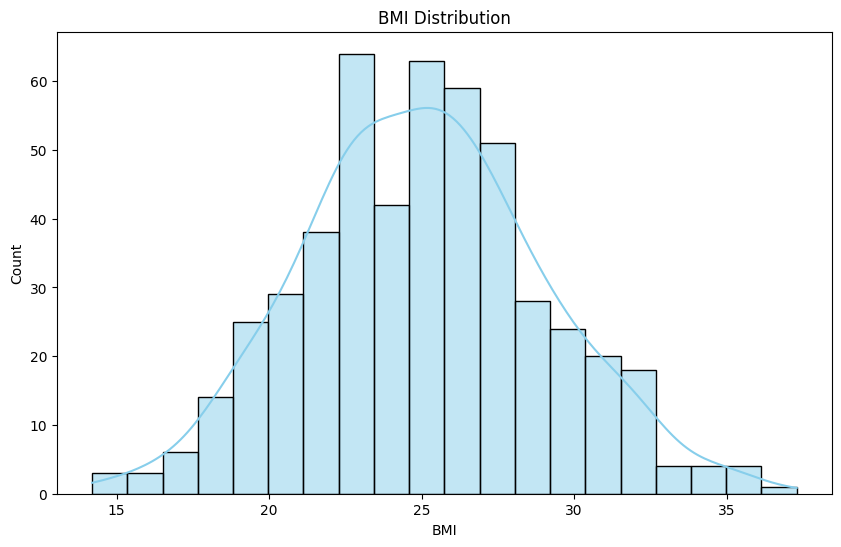

/tmp/ipython-input-915268547.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Disease_Risk", data=df, palette="Set2")


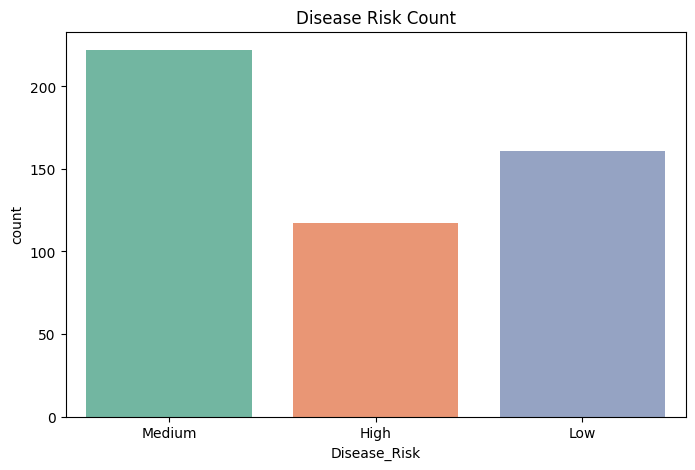

/tmp/ipython-input-915268547.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Disease_Risk", y="BMI", data=df, palette="Set3")


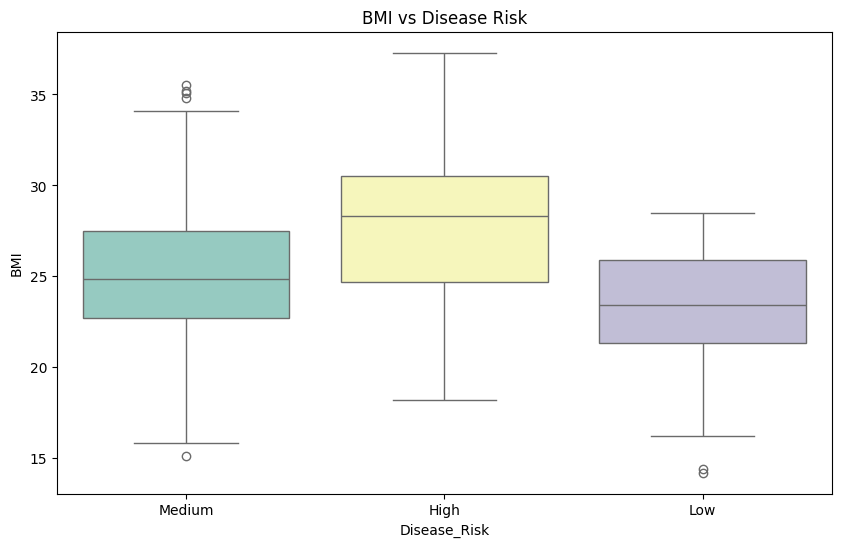

/tmp/ipython-input-915268547.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Disease_Risk", y="Sleep_hours", data=df, palette="Pastel1")


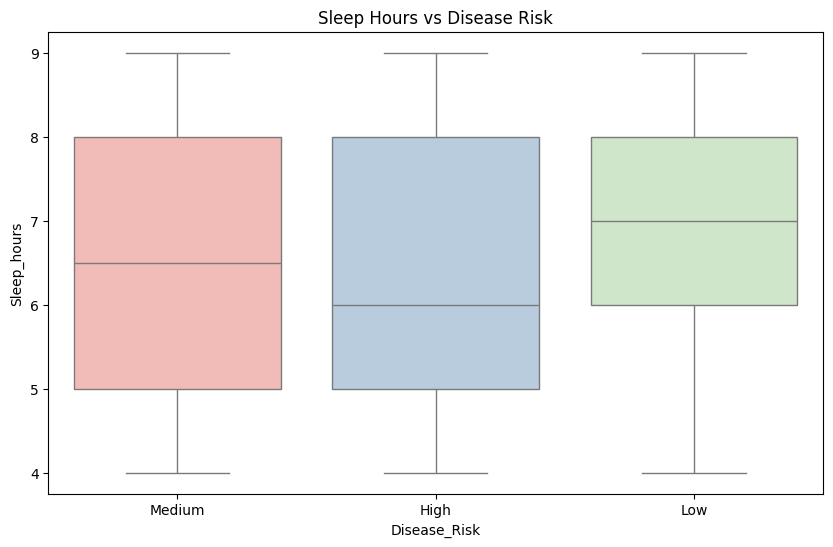

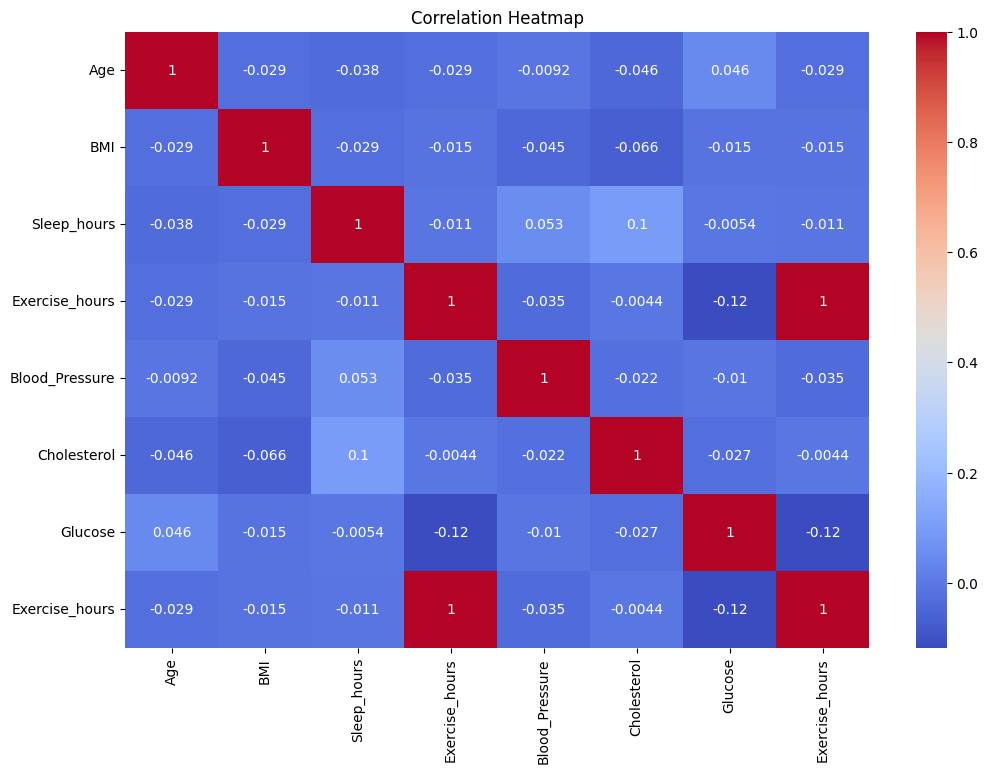


📊 Average features by Disease Risk:
                Age    BMI  Sleep_hours  Exercise_hours  Blood_Pressure  \
Disease_Risk                                                              
High          44.22  27.48         6.23            1.59          127.95   
Low           44.32  23.32         6.92            2.54          121.45   
Medium        44.15  25.06         6.40            2.00          128.54   

              Cholesterol  Glucose  
Disease_Risk                        
High               237.06   152.73  
Low                212.23   123.07  
Medium             232.08   135.36  

📊 Smoking distribution by Disease Risk:
Smoking        No  Yes
Disease_Risk          
High           40   77
Low           156    5
Medium        155   67

✅ Analytics tables saved


In [3]:

# LIFESTYLE & CLINICAL DATA ANALYSIS PIPELINE


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------- STEP 1: GENERATE SYNTHETIC DATA --------------------
np.random.seed(42)
n = 500

df = pd.DataFrame({
    "ID": range(1, n+1),
    "Age": np.random.randint(18, 70, n),
    "Gender": np.random.choice(["M", "F"], n),
    "BMI": np.round(np.random.normal(25, 4, n), 1),
    "Sleep_hours": np.random.randint(4, 10, n),
    "Exercise_hours": np.random.randint(0, 5, n),
    "Smoking": np.random.choice(["Yes", "No"], n, p=[0.3, 0.7]),
    "Alcohol": np.random.choice(["Yes", "No"], n, p=[0.4, 0.6]),
    "Blood_Pressure": np.random.randint(90, 160, n),
    "Cholesterol": np.random.randint(150, 300, n),
    "Glucose": np.random.randint(70, 200, n)
})

# ---------------- STEP 2: CREATE DISEASE RISK --------------------
# Assign risk based on multiple factors
def assign_risk(row):
    score = 0
    if row["BMI"] > 28: score += 2
    if row["Exercise_hours"] < 2: score += 1
    if row["Sleep_hours"] < 6: score += 1
    if row["Smoking"] == "Yes": score += 2
    if row["Alcohol"] == "Yes": score += 1
    if row["Blood_Pressure"] > 140: score += 1
    if row["Cholesterol"] > 240: score += 1
    if row["Glucose"] > 140: score += 1

    if score >= 5: return "High"
    elif score >= 3: return "Medium"
    else: return "Low"

df["Disease_Risk"] = df.apply(assign_risk, axis=1)

# Save dataset
df.to_csv("lifestyle_clinical_data.csv", index=False)
print(" Sample dataset created\n")

# ---------------- STEP 3: BASIC DATA EXPLORATION --------------------
print(df.head())
print("\nData Info:")
print(df.info())
print("\nNull values per column:")
print(df.isnull().sum())

# ---------------- STEP 4: STATISTICAL ANALYSIS --------------------
numeric_cols = ["Age", "BMI", "Sleep_hours", "Exercise_hours", "Blood_Pressure", "Cholesterol", "Glucose"]
print("\nCorrelation matrix:")
print(df[numeric_cols].corr())

# ---------------- STEP 5: VISUALIZATIONS --------------------
# BMI Distribution
plt.figure(figsize=(10,6))
sns.histplot(df["BMI"], bins=20, kde=True, color="skyblue")
plt.title("BMI Distribution")
plt.show()

# Disease Risk Count
plt.figure(figsize=(8,5))
sns.countplot(x="Disease_Risk", data=df, palette="Set2")
plt.title("Disease Risk Count")
plt.show()

# Boxplot of BMI by Disease Risk
plt.figure(figsize=(10,6))
sns.boxplot(x="Disease_Risk", y="BMI", data=df, palette="Set3")
plt.title("BMI vs Disease Risk")
plt.show()

# Sleep Hours vs Disease Risk
plt.figure(figsize=(10,6))
sns.boxplot(x="Disease_Risk", y="Sleep_hours", data=df, palette="Pastel1")
plt.title("Sleep Hours vs Disease Risk")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_cols + ["Exercise_hours"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# ---------------- STEP 6: GROUPED INSIGHTS --------------------
risk_summary = df.groupby("Disease_Risk")[numeric_cols].mean().round(2)
print("\n Average features by Disease Risk:")
print(risk_summary)

# Optional: count of smokers per risk
smoking_summary = df.groupby("Disease_Risk")["Smoking"].value_counts().unstack().fillna(0)
print("\n Smoking distribution by Disease Risk:")
print(smoking_summary)

# ---------------- STEP 7: SAVE ANALYTICS TABLE --------------------
risk_summary.to_csv("disease_risk_summary.csv")
smoking_summary.to_csv("smoking_distribution.csv")
print("\n Analytics tables saved")


# 🏥 Lifestyle & Clinical Factors Influencing Disease Risk

## 🔹 Project Overview
This project analyzes **lifestyle and clinical factors** to understand their impact on **disease risk**.  
It generates insights from synthetic patient data, including:

- Age, Gender, BMI, Sleep, Exercise, Smoking, Alcohol
- Blood Pressure, Cholesterol, Glucose
- Disease Risk (Low / Medium / High)

The pipeline includes **data cleaning, exploratory data analysis (EDA), visualizations, correlation analysis, and summary tables**.

---

## 🔹 Features
- Synthetic dataset generation for 500 patients
- Data cleaning and validation
- Exploratory Data Analysis (EDA)
- Visualizations: histograms, boxplots, countplots, heatmaps
- Grouped insights: average features by Disease Risk
- Analytics tables saved for reporting

---

## 🔹 Pipeline Steps
1. **Data Generation**: Simulate patient lifestyle and clinical data
2. **Data Cleaning**: Handle missing values and inconsistencies
3. **Exploratory Data Analysis (EDA)**: Summary statistics and correlations
4. **Visualizations**: BMI distribution, Disease risk count, boxplots, heatmaps
5. **Grouped Insights**: Average features by risk and distributions
6. **Analytics Output**: Save summary tables as CSV

---

## 🔹 Insights
- High BMI, low exercise, smoking, and alcohol consumption → higher disease risk
- Low sleep hours correlate with medium/high risk
- Blood pressure, cholesterol, and glucose are additional risk factors

---

## 🔹 Technologies
- Python 3.x
- Pandas & NumPy
- Matplotlib & Seaborn
- CSV files for storing datasets and analytics

---

## 🔹 Next Steps / Extensions
- Use real patient datasets for advanced analysis
- Build interactive dashboards with Plotly or Power BI
- Implement ML models to predict disease risk
- Add lifestyle recommendation system based on risk analysis
